In [1]:
import pandas as pd 
import numpy as np

In [2]:
link='https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring?select=fifa21_raw_data.csv%E2%80%8B'
path='./data/fifa21 raw data v2.csv'
df=pd.read_csv(path,low_memory=False)
pd.set_option('display.max_columns',None)
df.head(10)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595
5,188545,R. Lewandowski,Robert Lewandowski,https://cdn.sofifa.com/players/188/545/21_60.png,http://sofifa.com/player/188545/robert-lewando...,Poland,31,91,91,\n\n\n\nFC Bayern München,2014 ~ 2023,ST,184cm,80kg,Right,91,ST,"Jul 1, 2014",NaN,€111M,€240K,€132M,423,71,94,85,84,89,407,85,79,85,70,88,407,77,78,77,93,82,420,89,84,76,86,85,391,81,49,94,79,88,88,96,35,42,19,51,15,6,12,8,10,2195,457,4 ★,4★,High,Medium,4 ★,78,91,78,85,43,82,248
6,209331,M. Salah,Mohamed Salah,https://cdn.sofifa.com/players/209/331/21_60.png,http://sofifa.com/player/209331/mohamed-salah/...,Egypt,28,90,90,\n\n\n\nLiverpool,2017 ~ 2023,RW,175cm,71kg,Left,90,RW,"Jul 1, 2017",NaN,€120.5M,€250K,€144.3M,392,79,91,59,84,79,406,90,83,69,75,89,460,94,92,91,92,91,393,80,69,85,75,84,376,63,55,91,84,83,90,122,38,43,41,62,14,14,9,11,14,2211,470,3 ★,4★,High,Medium,3 ★,93,86,81,90,45,75,246
7,212831,Alisson,Alisson Ramses Becker,https://cdn.sofifa.com/players/212/831/21_60.png,http://sofifa.com/player/212831/alisson-ramses...,Brazil,27,90,91,\n\n\n\nLiverpool,2018 ~ 2024,GK,191cm,91kg,Right,90,GK,"Jul 19, 2018",NaN,€102M,€160K,€120

### Task 1 : Convert the height and weight columns to numerical forms

In [3]:
#In height column we notice that there is 'cm' and ' " ' that needs removing
print(df.Height.unique())

def convert_height(x):
    if x[-1]=='m' :
          return int(x[:-2])
    elif x[-1]=='"' :
        x.replace('\'','')
        foot = int(x[0]) * 30.48
        inch = int(x[2:-1]) * 2.54
        x= foot+inch
    return round(x)

['170cm' '187cm' '188cm' '181cm' '175cm' '184cm' '191cm' '178cm' '193cm'
 '185cm' '199cm' '173cm' '168cm' '176cm' '177cm' '183cm' '180cm' '189cm'
 '179cm' '195cm' '172cm' '182cm' '186cm' '192cm' '165cm' '194cm' '167cm'
 '196cm' '163cm' '190cm' '174cm' '169cm' '171cm' '197cm' '200cm' '166cm'
 '6\'2"' '164cm' '198cm' '6\'3"' '6\'5"' '5\'11"' '6\'4"' '6\'1"' '6\'0"'
 '5\'10"' '5\'9"' '5\'6"' '5\'7"' '5\'4"' '201cm' '158cm' '162cm' '161cm'
 '160cm' '203cm' '157cm' '156cm' '202cm' '159cm' '206cm' '155cm']


In [4]:
df.Height=df.Height.apply(convert_height) 
df.Height.unique()
df.rename(columns={'Height':'Height_cm'},inplace=True)

In [5]:
def convert_weight(y):
    if 'lbs' in y:
        y = y.replace('lbs',' ')
        y = float(y) * 0.45359237
        y=int(y)
        return y
    else:
        return int(y[:-2])
    
df.Weight=df.Weight.apply(convert_weight)
print(df.Weight.unique())
df.rename(columns={'Weight':'Weight_kg'},inplace=True)

[ 72  83  87  70  68  80  71  91  73  85  92  69  84  96  81  82  75  86
  89  74  76  64  78  90  66  60  94  79  67  65  59  61  93  88  97  77
  62  63  95 100  58  98 103  99 102  56 101  57  55 104 107 110  53  50
  54  52]


### Task 2 : separate the joined column into year , month and day columns

In [6]:
df['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974    Jul 13, 2018
18975     Aug 1, 2020
18976     Mar 8, 2019
18977    Sep 22, 2020
18978    Jul 29, 2019
Name: Joined, Length: 18979, dtype: object

In [7]:
year=[]
def Extract_year():
    for i in df["Joined"]:
        year.append(i.split(" ")[2])
    return year
month=[]
def Extract_month():
    for j in df['Joined']:
        month .append(j.split(' ')[0])
    return month
day=[]
def Extract_day():
    for k in df['Joined']:
        day.append(k.split(' ')[1].replace(',',' '))
    return day
df['day']=Extract_day()
df['month']=Extract_month()
df['year']=Extract_year()

df=df.drop('Joined',axis='columns')

In [8]:
last_three_columns = df.iloc[:, -3:]
print(last_three_columns)

       day month  year
0       1    Jul  2004
1      10    Jul  2018
2      16    Jul  2014
3      30    Aug  2015
4       3    Aug  2017
...    ...   ...   ...
18974  13    Jul  2018
18975   1    Aug  2020
18976   8    Mar  2019
18977  22    Sep  2020
18978  29    Jul  2019

[18979 rows x 3 columns]


### Task 3 : Clean and transform the value , wage and release clause columns into ingtegers

In [9]:
print(df.iloc[:,18:21])

         Value   Wage Release Clause
0      €103.5M  €560K        €138.4M
1         €63M  €220K         €75.9M
2        €120M  €125K        €159.4M
3        €129M  €370K          €161M
4        €132M  €270K        €166.5M
...        ...    ...            ...
18974    €100K    €1K           €70K
18975    €130K   €500          €165K
18976    €120K   €500          €131K
18977    €100K    €2K           €88K
18978    €100K    €1K           €79K

[18979 rows x 3 columns]


In [10]:
def transform_value(str):
    new_string=str.replace('€','')
    if 'K' in new_string:
         return int(float(new_string.strip("K"))*1000)
    elif 'M' in new_string:
        return int(float(new_string.strip("M"))*1000000)
    else :
         return new_string          

In [11]:
df['Value']=df['Value'].apply(transform_value)
df['Wage']=df['Wage'].apply(transform_value)
df['Release Clause']=df['Release Clause'].apply(transform_value)

df.rename(columns={'Value':'Value_€','Wage':'Wage_€','Release Clause':'Release Clause_€'}, inplace=True)
#Rename these columns so that we know the units in advance

In [12]:
print( df.iloc[:,18:21])

         Value_€  Wage_€ Release Clause_€
0      103500000  560000        138400000
1       63000000  220000         75900000
2      120000000  125000        159400000
3      129000000  370000        161000000
4      132000000  270000        166500000
...          ...     ...              ...
18974     100000    1000            70000
18975     130000     500           165000
18976     120000     500           131000
18977     100000    2000            88000
18978     100000    1000            79000

[18979 rows x 3 columns]


 ### Task 4: Some columns have 'star' characters.Strip those columns of these star characters and make the columns numerical

In [13]:
# the columns with star are SM , W/F and IR 
print(df['SM'])
def remove_star(x):
    x=x.replace('★',' ')
    return x

0        4★
1        5★
2        1★
3        4★
4        5★
         ..
18974    2★
18975    2★
18976    2★
18977    2★
18978    2★
Name: SM, Length: 18979, dtype: object


In [14]:
ord('★')

9733

In [15]:
chr(9733)

'★'

In [16]:
df.SM=df.SM.apply(remove_star)
df['IR']=df['IR'].apply(remove_star)
df['W/F']=df['W/F'].apply(remove_star)
print(df.IR.unique())

['5  ' '3  ' '4  ' '2  ' '1  ']


### Task 5 Convert the Hits column into dtype:int64 and replace the K with 1000 and replace the Nan values with 0

In [17]:
print(df.isnull().sum())

ID              0
Name            0
LongName        0
photoUrl        0
playerUrl       0
             ... 
PHY             0
Hits         2595
day             0
month           0
year            0
Length: 79, dtype: int64


In [18]:
#We notice 'K' values that need to be replaced and also dtype=object needs to get converted to int type
df.Hits.unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [19]:
def hit_conv(a):
    if  'K' in a:
        a=a.replace('K','')
        a=float(a)*1000
        return round(a)
    else:
        return a
df.Hits=df.Hits.fillna('0')    
df.Hits=df.Hits.apply(hit_conv)
df.Hits=df.Hits.astype('int64')
print(df['Hits'])

0        771
1        562
2        150
3        207
4        595
        ... 
18974      0
18975      0
18976      0
18977      0
18978      0
Name: Hits, Length: 18979, dtype: int64


In [20]:
df.head(8)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height_cm,Weight_kg,Preferred Foot,BOV,Best Position,Loan Date End,Value_€,Wage_€,Release Clause_€,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,day,month,year
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,NaN,103500000,560000,138400000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,1,Jul,2004
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,NaN,63000000,220000,75900000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,10,Jul,2018
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,NaN,120000000,125000,159400000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,16,Jul,2014
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,NaN,129000000,370000,161000000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,30,Aug,2015
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,NaN,132000000,270000,166500000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,3,Aug,2017
5,188545,R. Lewandowski,Robert Lewandowski,https://cdn.sofifa.com/players/188/545/21_60.png,http://sofifa.com/player/188545/robert-lewando...,Poland,31,91,91,\n\n\n\nFC Bayern München,2014 ~ 2023,ST,184,80,Right,91,ST,NaN,111000000,240000,132000000,423,71,94,85,84,89,407,85,79,85,70,88,407,77,78,77,93,82,420,89,84,76,86,85,391,81,49,94,79,88,88,96,35,42,19,51,15,6,12,8,10,2195,457,4,4,High,Medium,4,78,91,78,85,43,82,248,1,Jul,2014
6,209331,M. Salah,Mohamed Salah,https://cdn.sofifa.com/players/209/331/21_60.png,http://sofifa.com/player/209331/mohamed-salah/...,Egypt,28,90,90,\n\n\n\nLiverpool,2017 ~ 2023,RW,175,71,Left,90,RW,NaN,120500000,250000,144300000,392,79,91,59,84,79,406,90,83,69,75,89,460,94,92,91,92,91,393,80,69,85,75,84,376,63,55,91,84,83,90,122,38,43,41,62,14,14,9,11,14,2211,470,3,4,High,Medium,3,93,86,81,90,45,75,246,1,Jul,2017
7,212831,Alisson,Alisson Ramses Becker,https://cdn.sofifa.com/players/212/831/21_60.png,http://sofifa.com/player/212831/alisson-ramses...,Brazil,27,90,91,\n\n\n\nLiverpool,2018 ~ 2024,GK,191,91,Right,90,GK,NaN,102000000,160000,120300000,114,17,13,19,45,20,138,

In [21]:
#Now we see that the dataset has only non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height_cm         18979 non-null  int64 
 13  Weight_kg         18979 non-null  int64 
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Loan Date En

### Task 6 Cleaning the club column from newline characters

In [22]:
df.Club=df.Club.str.replace('\n\n\n\n','')
print(df.Club)

0               FC Barcelona
1                   Juventus
2            Atlético Madrid
3            Manchester City
4        Paris Saint-Germain
                ...         
18974             Wuhan Zall
18975        Oldham Athletic
18976             Derry City
18977       Dalian YiFang FC
18978       Dalian YiFang FC
Name: Club, Length: 18979, dtype: object


### Task 7 Categorizing the Contract column

In [23]:
df.Contract.unique()
#We observe that some players are on contract , some are with no contract and  others are on loan

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [24]:
# We will create one new column from Contract column based on their Contract status

def contract_sep(x):
    if '~' in x :
        x= 'ACTIVE'
        return x
    elif 'On Loan' in x :
        x='ON LOAN'
        return x
    elif 'Free':
        x='FREE AGENT'
        return x
    
df['Contract_status']=df.Contract.apply(contract_sep)
print(df.Contract_status.unique())

#Now we can easily see on which category each player belongs to 

['ACTIVE' 'ON LOAN' 'FREE AGENT']


In [25]:
df.rename(columns={'↓OVA':'OVA'}, inplace=True)
print(df.OVA)

0        93
1        92
2        91
3        91
4        91
         ..
18974    47
18975    47
18976    47
18977    47
18978    47
Name: OVA, Length: 18979, dtype: int64


In [26]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height_cm,Weight_kg,Preferred Foot,BOV,Best Position,Loan Date End,Value_€,Wage_€,Release Clause_€,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,day,month,year,Contract_status
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,NaN,103500000,560000,138400000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,1,Jul,2004,ACTIVE
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,NaN,63000000,220000,75900000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,10,Jul,2018,ACTIVE
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,NaN,120000000,125000,159400000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,16,Jul,2014,ACTIVE
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,NaN,129000000,370000,161000000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,30,Aug,2015,ACTIVE
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,NaN,132000000,270000,166500000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,3,Aug,2017,ACTIVE


### Some EDA to end the project

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

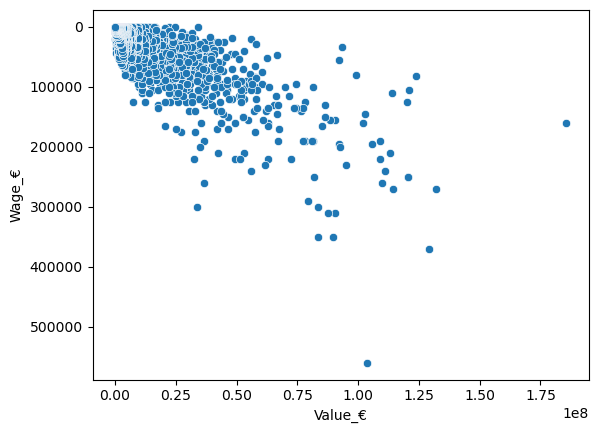

In [28]:
sns.scatterplot(x='Value_€',y='Wage_€',data=df ,palette ='husl')
plt.show()
#From this visual we notice that 